# **SUPERVISED LEARNING**

Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.

---------
--------
## Query SQL

SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2,

bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month 

FROM `bigquery-public-data.ml_datasets.credit_card_default`

LIMIT 21945

--------

## Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

import pickle
import ast

Import pustaka yang akan digunakan pada analisa dataset ini

----

## Data Loading

In [2]:
data = pd.read_csv('h8dsft_P1M1_reynaldimarchiano.csv')
df = data.copy()
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


Load data dan menyimpan ke dalam variabel df

In [3]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


----
## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Data bertipe int dan object saja dan terlihat tidak ada nilai Null. Jumlah row data 2965 sehingga tidak berpengaruh saat query SQL dengan LIMIT 21945

----

#### *Berapa % default_payment_next_month yang 'YES' pada dataset?*

Default payment (1=yes, 0=no)

In [5]:
dpnm = df.groupby('default_payment_next_month')['sex'].count()
dpnm

default_payment_next_month
0    2330
1     635
Name: sex, dtype: int64

Jumlah NO jauh lebih banyak dibanding YES

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default_payment_next_month', ylabel='count'>

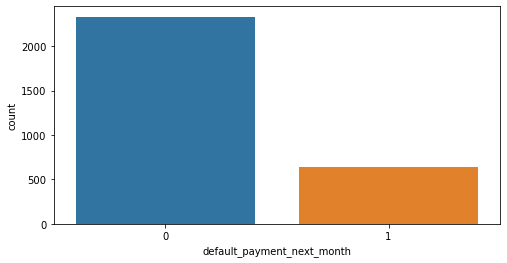

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(df['default_payment_next_month'])

Ploting untuk visualisasi jumlah tiap YES dan NO di default_payment_next_month

In [7]:
print(round((635/2330*100),2),'%')

27.25 %


> default_payment_next_month yang 'YES' pada dataset pada dataset ini sebesar **27.25 %**

#### *Apakah education level berpengaruh terhadap default_payment_next_month?*

Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [8]:
df['education_level'].value_counts()

2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

Berdasarkan jumlahnya yang terbesar adalah kategori 2 atau University.

<AxesSubplot:xlabel='education_level', ylabel='count'>

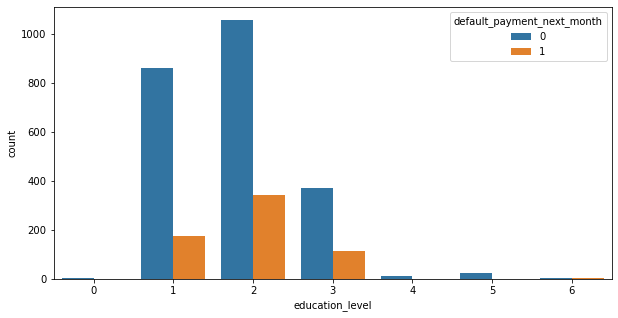

In [9]:
edu = df[['default_payment_next_month','education_level']]

plt.figure(figsize=(10,5))
sns.countplot(data=edu,x='education_level',hue='default_payment_next_month')

Jika dilihat dari grafik diatas, tingkat pendidikan tidak terlalu berpengaruh karena jumlah terbanyak justru ada pada level universitas dan yang terrendah adalah level high school.

<AxesSubplot:xlabel='marital_status', ylabel='count'>

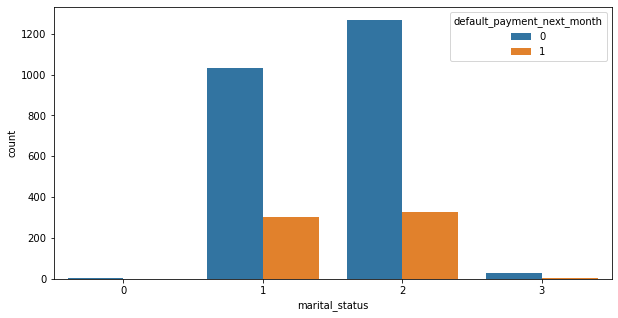

In [10]:
mar = df[['default_payment_next_month','marital_status']]

plt.figure(figsize=(10,5))
sns.countplot(data=mar,x='marital_status',hue='default_payment_next_month')

Berdasarkan description pada data Marital status (1=married, 2=single, 3=others), walaupun jumlah single lebih banyak namun jumlah kategori 1 default payment pada single hampir sama dengan yang kategori 1 pada married. Berdasarkan boxplot diatas terdapat nilai 0 yang tidak termasuk dalam kategori married, nilai 0 akan dihandle sebagai outlier.

In [11]:
num_col = df.select_dtypes(include=['int64','float64']).copy()
cat_col = df.select_dtypes(include=['object']).copy()

num_col

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


Memisahkan data numerik dan kategorik untuk melihat lebih detail di cell selanjutnya

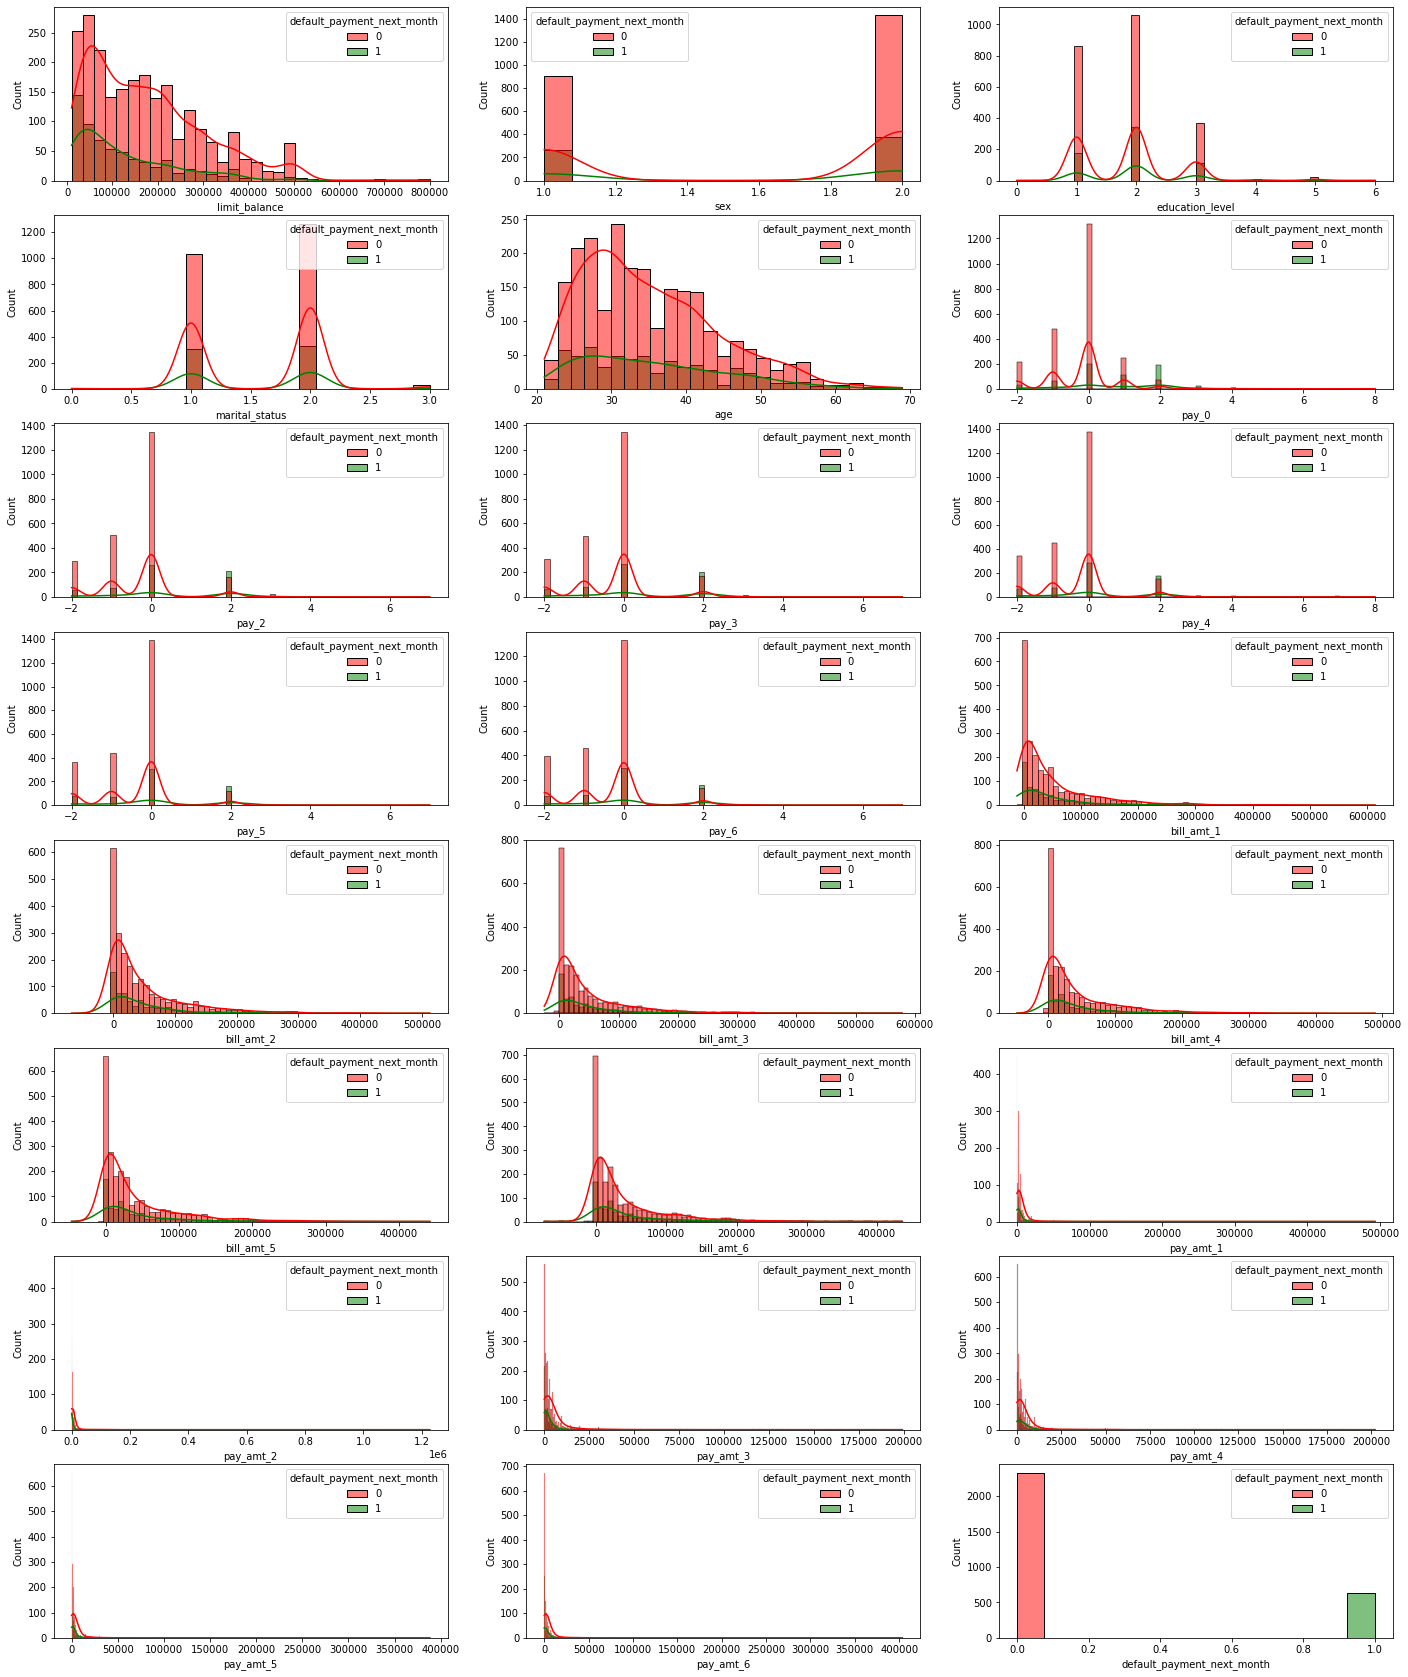

In [12]:
plt.figure(figsize=(24,30))

for i, col in enumerate(list(num_col.columns)):
    i += 1
    plt.subplot(8,3,i)
    sns.histplot(data = num_col, x = num_col[col], hue = df['default_payment_next_month'], 
                 palette = {1:'green', 0:'red'}, kde = True)


Plot diatas adalah untuk melihat sebaran data setiap kolom, misal pada kolom limit_balance dan age sebarannya terlihat skewed. Pada kolom-kolom pay_n terlihat banyak yang membayar tepat waktu. Lalu pada kolom bill_ setiap bulannya pembayaran dengan jumlah sedikit jauh lebih banyak dibanding yang lain.

<AxesSubplot:>

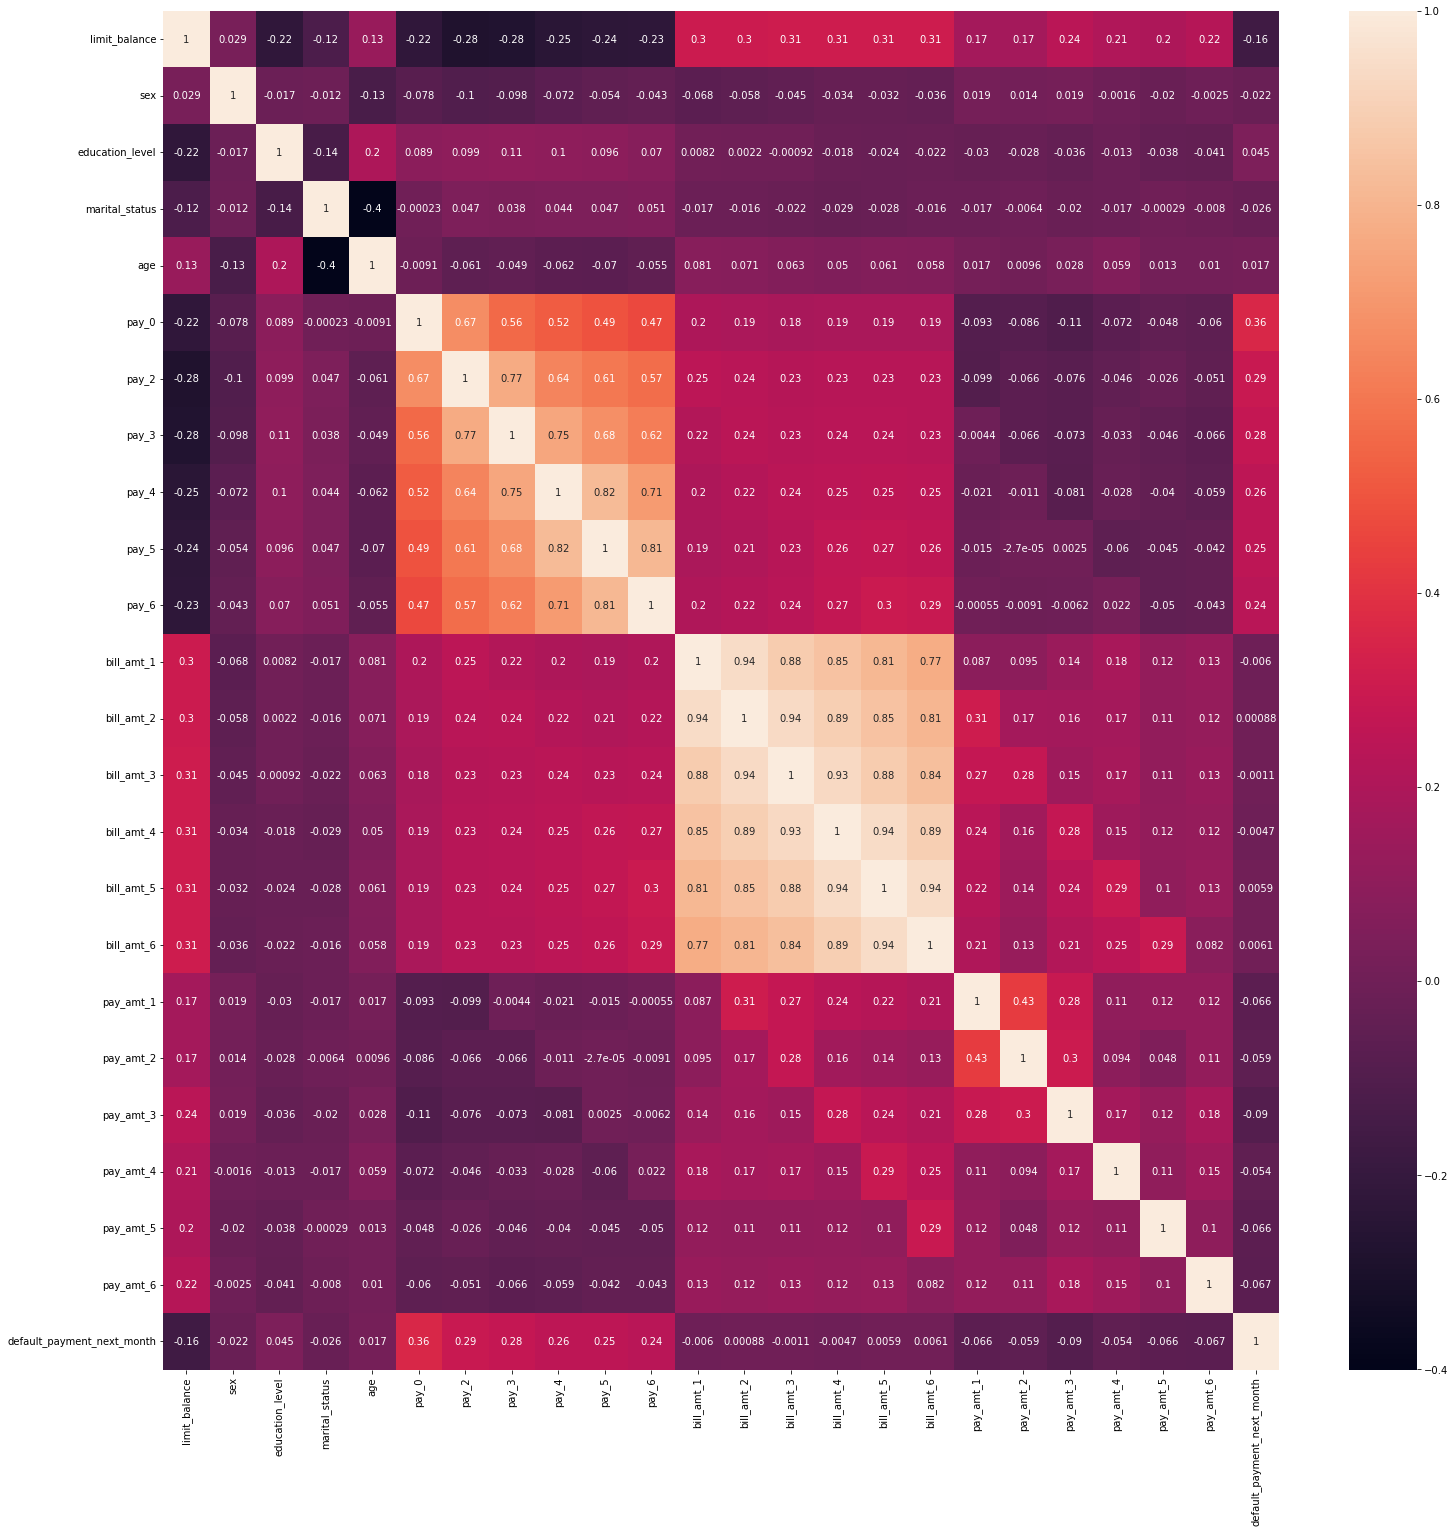

In [13]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

Berdasarkan heatmap korelasi antar kolom diatas dapat kita lihat tidak semua data berkorelasi dengan baik. Kolom-kolom pay_n berkorelasi satu sama lain namun tidak dengan kolom lain, sama halnya pada kolomg bill_amt_n. Untuk kolom default_payment_next_month, kebanyakan bisa dibilang tidak berkorelasi hanya pada kolom-kolom pay_n saja yang terlihat sedikit berkorelasi.

----
## Data Preprocessing

In [14]:
df.rename(columns={'default_payment_next_month':'def_pay','education_level':'edu','marital_status':'marriage'},inplace=True)
df.head()

,limit_balance,sex,edu,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_pay
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


Rename beberapa kolom untuk mempermudah dan mempersingkat pengetikan.

In [15]:
# change the datatype of categorical features from integer to category
df.sex = df.sex.astype("object")
df.edu = df.edu.astype("object")
df.marriage = df.marriage.astype("object")
df.age = df.age.astype("int64")
df.pay_0 = df.pay_0.astype("int64")
df.pay_2 = df.pay_2.astype("int64")
df.pay_3 = df.pay_3.astype("int64")
df.pay_4 = df.pay_4.astype("int64")
df.def_pay = df.def_pay.astype("object")

Mengubah tipe data untuk nantinya pengelompokan berdasarkan kategori.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   limit_balance  2965 non-null   float64
 1   sex            2965 non-null   object 
 2   edu            2965 non-null   object 
 3   marriage       2965 non-null   object 
 4   age            2965 non-null   int64  
 5   pay_0          2965 non-null   int64  
 6   pay_2          2965 non-null   int64  
 7   pay_3          2965 non-null   int64  
 8   pay_4          2965 non-null   int64  
 9   pay_5          2965 non-null   int64  
 10  pay_6          2965 non-null   int64  
 11  bill_amt_1     2965 non-null   float64
 12  bill_amt_2     2965 non-null   float64
 13  bill_amt_3     2965 non-null   float64
 14  bill_amt_4     2965 non-null   float64
 15  bill_amt_5     2965 non-null   float64
 16  bill_amt_6     2965 non-null   float64
 17  pay_amt_1      2965 non-null   float64
 18  pay_amt_

Memunculkan kembali info dari dataset df untuk melihat tipe dan jumlah nilai null

In [17]:
df['def_pay'] = np.where(df['def_pay']==0,'NO','YES')
df['def_pay'].unique()

array(['NO', 'YES'], dtype=object)

Mengganti value dari kolom def_pay menjadi YES dan NO

### a. Inference

In [18]:
# get data for model inference
df_inf = df.sample(10, random_state=3)
df_inf

,limit_balance,sex,edu,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_pay
1696,100000.0,1,2,2,31,1,2,0,0,0,...,80051.0,76446.0,76815.0,0.0,3631.0,3000.0,3000.0,2800.0,2697.0,NO
1752,10000.0,2,2,2,27,1,2,2,0,0,...,9808.0,8650.0,0.0,1230.0,0.0,500.0,450.0,0.0,0.0,YES
2369,180000.0,2,2,1,29,1,4,3,2,2,...,3455.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO
2269,300000.0,1,1,2,32,-2,-2,-2,-2,-2,...,264.0,414.0,264.0,264.0,264.0,264.0,414.0,264.0,264.0,NO
87,230000.0,2,2,2,38,0,0,0,0,0,...,111039.0,113365.0,115625.0,3867.0,3941.0,4123.0,4267.0,4300.0,4084.0,NO
164,360000.0,2,1,2,32,0,0,0,0,0,...,241226.0,241673.0,233157.0,10130.0,12649.0,8916.0,7725.0,8900.0,6956.0,NO
1036,380000.0,2,1,2,34,-1,0,0,0,0,...,115548.0,164296.0,72084.0,100000.0,12384.0,100000.0,50000.0,20000.0,52500.0,NO
1799,140000.0,1,2,2,28,2,2,2,2,2,...,13994.0,14222.0,14537.0,1600.0,600.0,700.0,600.0,700.0,600.0,YES
160,90000.0,2,3,2,26,0,0,0,0,0,...,1769.0,2269.0,3269.0,3000.0,3000.0,1000.0,500.0,1000.0,86500.0,NO
21,120000.0,2,2,2,43,0,0,0,-1,0,...,25638.0,26092.0,14586.0,77225.0,21903.0,25646.0,5080.0,0.0,5052.0,NO


Mengambil 10 data inference untuk nantinya diuji coba terhadap model yang sudah dibuat.

In [19]:
df_train_test = df.drop(df_inf.index)
df_train_test

,limit_balance,sex,edu,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_pay
0,50000.0,1,1,2,39,0,0,0,0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,NO
1,110000.0,2,1,2,29,0,0,0,0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,NO
2,270000.0,1,1,2,36,0,0,0,2,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,NO
3,130000.0,1,1,1,45,0,0,0,0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,NO
4,50000.0,1,1,2,24,0,0,0,0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39,-1,-1,-1,-1,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,NO
2961,280000.0,2,1,1,41,2,-1,-1,-1,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,NO
2962,80000.0,1,1,2,28,1,-1,-1,-1,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,NO
2963,200000.0,1,2,1,53,1,-1,-1,-2,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,YES


Data yang telah dipisahkan dari 10 data inference disimpan dalam variabel df_train_test

In [20]:
# reset index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,limit_balance,sex,edu,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_pay
0,100000.0,1,2,2,31,1,2,0,0,0,...,80051.0,76446.0,76815.0,0.0,3631.0,3000.0,3000.0,2800.0,2697.0,NO
1,10000.0,2,2,2,27,1,2,2,0,0,...,9808.0,8650.0,0.0,1230.0,0.0,500.0,450.0,0.0,0.0,YES
2,180000.0,2,2,1,29,1,4,3,2,2,...,3455.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO
3,300000.0,1,1,2,32,-2,-2,-2,-2,-2,...,264.0,414.0,264.0,264.0,264.0,264.0,414.0,264.0,264.0,NO
4,230000.0,2,2,2,38,0,0,0,0,0,...,111039.0,113365.0,115625.0,3867.0,3941.0,4123.0,4267.0,4300.0,4084.0,NO
5,360000.0,2,1,2,32,0,0,0,0,0,...,241226.0,241673.0,233157.0,10130.0,12649.0,8916.0,7725.0,8900.0,6956.0,NO
6,380000.0,2,1,2,34,-1,0,0,0,0,...,115548.0,164296.0,72084.0,100000.0,12384.0,100000.0,50000.0,20000.0,52500.0,NO
7,140000.0,1,2,2,28,2,2,2,2,2,...,13994.0,14222.0,14537.0,1600.0,600.0,700.0,600.0,700.0,600.0,YES
8,90000.0,2,3,2,26,0,0,0,0,0,...,1769.0,2269.0,3269.0,3000.0,3000.0,1000.0,500.0,1000.0,86500.0,NO
9,120000.0,2,2,2,43,0,0,0,-1,0,...,25638.0,26092.0,14586.0,77225.0,21903.0,25646.0,5080.0,0.0,5052.0,NO


Cell diatas untuk reset index dari kedua dataset yang telah dipisahkan.

### b. Splitting Data

In [21]:
# Split between `X` (Features) and `y` (Target)
X = df_train_test.drop('def_pay',axis=1)
y = df_train_test['def_pay']
X

,limit_balance,sex,edu,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000.0,1,1,2,39,0,0,0,0,0,...,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,110000.0,2,1,2,29,0,0,0,0,0,...,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,270000.0,1,1,2,36,0,0,0,2,0,...,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,130000.0,1,1,1,45,0,0,0,0,0,...,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,50000.0,1,1,2,24,0,0,0,0,0,...,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,210000.0,2,2,1,39,-1,-1,-1,-1,-2,...,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0
2951,280000.0,2,1,1,41,2,-1,-1,-1,-2,...,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0
2952,80000.0,1,1,2,28,1,-1,-1,-1,-2,...,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0
2953,200000.0,1,2,1,53,1,-1,-1,-2,-2,...,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0


Memisahkan data fitur dan target yang akan dimodelkan nanti

In [22]:
# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)


# split data into train+validation set and test set
# X_trainval, X_test, y_trainval, y_test = train_test_split(X,y, random_state=22)
# split train+validation set into training and validation sets
# X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=23)
print('X_train Size =', X_train.shape)
print('X_test Size  =', X_test.shape)
print('y_train Size =', y_train.shape)
print('y_test Size  =', y_test.shape)

X_train Size = (2364, 23)
X_test Size  = (591, 23)
y_train Size = (2364,)
y_test Size  = (591,)


Splitting data X dan y ke Train-Test set, lalu diperiksa shapenya

### c. Handling Missing Values

In [23]:
df.isnull().sum()

limit_balance    0
sex              0
edu              0
marriage         0
age              0
pay_0            0
pay_2            0
pay_3            0
pay_4            0
pay_5            0
pay_6            0
bill_amt_1       0
bill_amt_2       0
bill_amt_3       0
bill_amt_4       0
bill_amt_5       0
bill_amt_6       0
pay_amt_1        0
pay_amt_2        0
pay_amt_3        0
pay_amt_4        0
pay_amt_5        0
pay_amt_6        0
def_pay          0
dtype: int64

> Tidak ada missing values pada data, namun nanti ada proses imputasi agar tidak error dalam preprocessing

### d. Handling Outliers


In [24]:
ix = (X_train[(X_train['marriage']==0)]).index
ix

Int64Index([1852, 255, 2268, 1494], dtype='int64')

Berdasarkan EDA tadi untuk kolom marriage akan di drop data yang mempunyai value 0

In [25]:
X_train.drop(ix,inplace=True)
y_train.drop(ix,inplace=True)

Drop data pada X_train dan y_train sesuai index yang mempunyai value 0

In [26]:
X_train.describe()

,limit_balance,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000
mean,161762.711864,35.117373,0.011017,-0.124576,-0.139831,-0.184322,-0.224576,-0.254237,51045.228390,49681.881780,46889.238983,43065.467797,40100.597458,38933.925847,6420.564831,5528.415678,5095.157627,4686.189407,4852.978814,5386.797881
std,125241.719857,9.137091,1.112135,1.179767,1.198037,1.189330,1.169953,1.180500,72507.592595,70801.882989,67607.179071,61902.323939,58420.968057,57507.716991,20522.285728,18131.150712,14200.395662,14353.279722,17376.929270,18150.541367
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-4577.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3739.500000,3012.750000,2933.000000,2499.250000,1726.250000,1349.000000,1000.000000,780.000000,441.500000,299.000000,312.500000,143.000000
50%,140000.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22830.000000,21753.500000,20203.500000,19270.500000,18404.000000,18016.000000,2105.500000,2071.500000,1953.500000,1545.000000,1583.000000,1569.500000
75%,230000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65930.250000,63932.500000,60802.750000,55514.750000,50954.000000,50303.500000,5009.500000,5000.000000,4446.000000,4000.000000,4000.000000,4000.000000
max,800000.000000,69.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,533142.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,405016.000000,580464.000000,199209.000000,202076.000000,388071.000000,403500.000000


Cell diatas untuk melihat rata-rata, standar deviasi, nilai min max, q1 ,q2, q3 dari semua kolom numerikal.

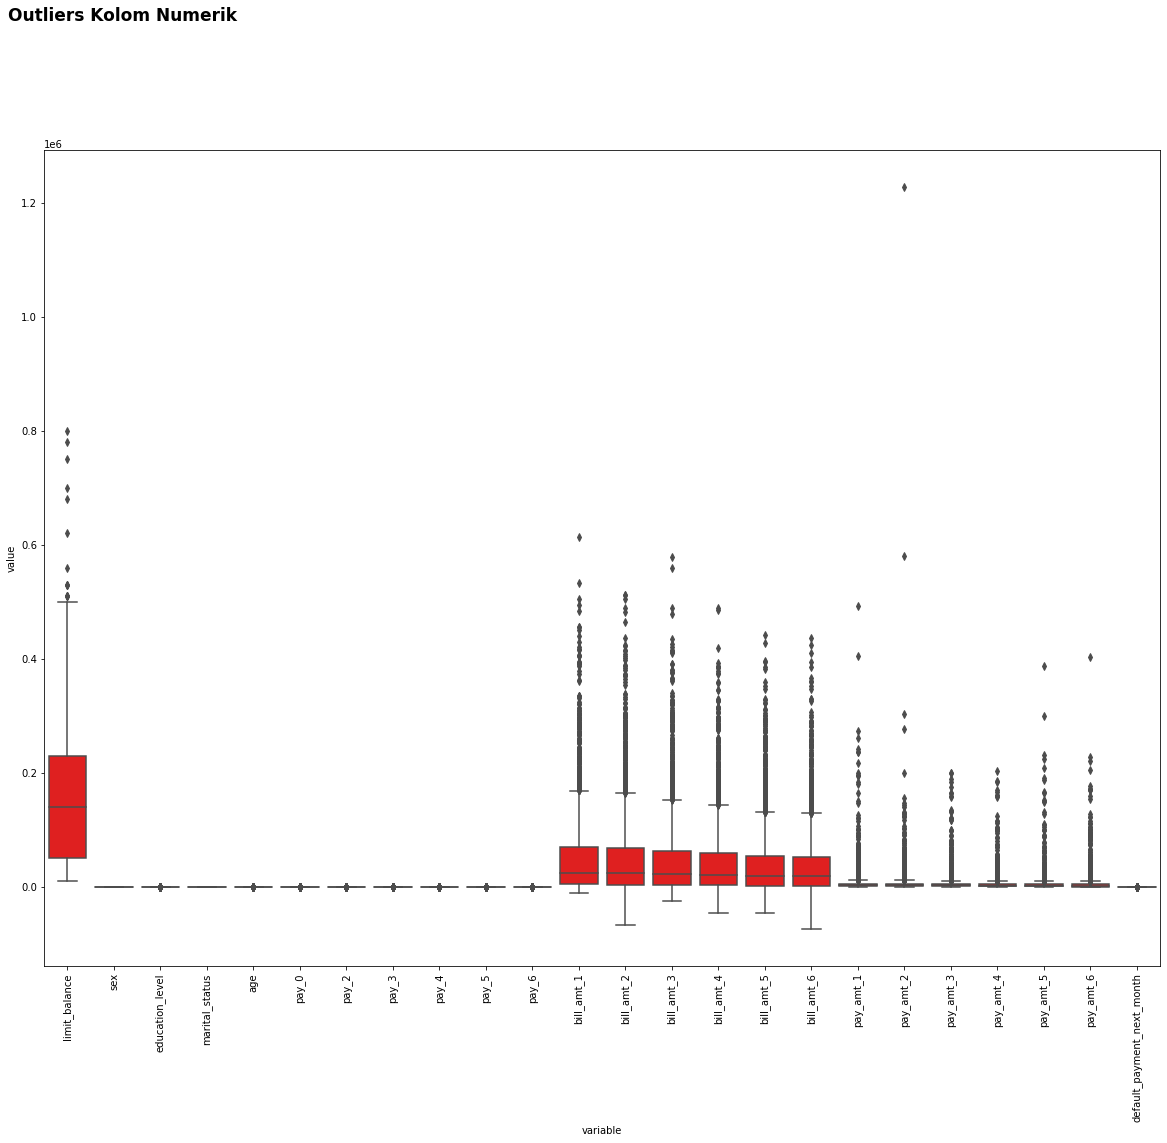

In [27]:
numeric = data[[feature for feature in num_col if feature not in []]]
numericmelt = numeric.melt()
plt.figure(figsize=(20,15))
plt.figtext(0.1, 1, "Outliers Kolom Numerik", fontsize=17, fontweight='bold')
box = sns.boxplot(x='variable', y='value', data=numericmelt, palette=['r']*len(num_col))
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

In [28]:
df.skew()

C:\Users\DELL\AppData\Local\Temp/ipykernel_20460/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


limit_balance     1.000442
sex              -0.441625
edu               0.899875
marriage         -0.020106
age               0.772887
pay_0             0.926790
pay_2             0.861762
pay_3             0.931460
pay_4             1.101504
pay_5             1.060173
pay_6             0.978760
bill_amt_1        2.484598
bill_amt_2        2.458349
bill_amt_3        2.569937
bill_amt_4        2.448175
bill_amt_5        2.400343
bill_amt_6        2.432406
pay_amt_1        11.877647
pay_amt_2        29.404261
pay_amt_3         8.044639
pay_amt_4         8.451541
pay_amt_5        11.468890
pay_amt_6         9.760184
dtype: float64

Berdasarkan hasil analisis melihat boxplot dan nilai skewness, data tersebut memang banyak outliers, tapi data hutang dan pembayaran ini bisa diasumsikan memang tidak ada nilai maximum dan minimum seseorang punya hutang atau membayar hutangnya. Maka akan diputuskan untuk tidak handle outliers. Ada beberapa model yang digunakan juga tidak sensitif terhadap outliers seperti Decision Tree dan Random Forest.

### e. Feature Selection

In [29]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['limit_balance', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns :  ['sex', 'edu', 'marriage']


Memisahkan data berdasarkan kolom numerik dan kategorik

### f. Scaling

In [30]:
print('X_train skewness =\n',X_train.skew())
print('X_test skewness =\n',X_test.skew())

X_train skewness =
 limit_balance     0.998423
sex              -0.472237
edu               0.940592
marriage          0.015151
age               0.778204
pay_0             0.914693
pay_2             0.832914
pay_3             0.951602
pay_4             1.105344
pay_5             1.115414
pay_6             1.049673
bill_amt_1        2.502271
bill_amt_2        2.462757
bill_amt_3        2.598830
bill_amt_4        2.546133
bill_amt_5        2.508345
bill_amt_6        2.547852
pay_amt_1         9.829392
pay_amt_2        18.347657
pay_amt_3         8.327732
pay_amt_4         8.179930
pay_amt_5        11.837724
pay_amt_6        10.022699
dtype: float64
X_test skewness =
 limit_balance     1.024044
sex              -0.312463
edu               0.724160
marriage         -0.014624
age               0.753320
pay_0             1.009375
pay_2             0.982098
pay_3             0.843037
pay_4             1.101720
pay_5             0.829845
pay_6             0.661108
bill_amt_1        2.459434
b

Data cenderung skewed dengan variasi ada yang >0.5 dan <0.5 maka akan menggunakan MinMaxScaler

In [31]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),('scaler', MinMaxScaler())])

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

Penggunaan OneHotEncoder karena data categorical bersifat nominal

In [32]:
preprocessor =  ColumnTransformer([
    ('numeric', num_pipeline,['limit_balance', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
                              'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                              'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']),
    ('category', cat_pipeline,['sex', 'edu', 'marriage'])
])

ColumnTransformer untuk pengolahan handling missing value berdasarkan kategori dalam pipeline

----

## 1. Logistic Regression

In [33]:
pipeline_logreg = Pipeline([('prepro',preprocessor),('logreg',LogisticRegression(),)])

Pembuatan model pipeline regresi logistik dengan memasukkan proses preprocessing yang sebelumnya telah dibuat dan menggunakan hyperparameter default.

In [34]:
pipeline_logreg.fit(X_train,y_train)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'pay_0', 'pay_2', 'pay_3',
                                                   'pay_4', 'pay_5', 'pay_6',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                         

Cell diatas adalah proses fit dengan model regresi logistik terhadap X_train dan y_train.

In [35]:
cvscoreslog = cross_val_score(pipeline_logreg, X_train, y_train, cv=3, scoring='accuracy')
print('Accuracy - All - LogReg CV   : ', cvscoreslog)
print('Accuracy - Mean - LogReg CV  : ', cvscoreslog.mean())
print('Accuracy - Std - LogReg CV   : ', cvscoreslog.std())
print('Accuracy - Range of Test-Set : ', (cvscoreslog.mean()-cvscoreslog.std()) , '-', (cvscoreslog.mean()+cvscoreslog.std()))
cvmeanlog = np.mean(cvscoreslog)

Accuracy - All - LogReg CV   :  [0.82337992 0.80304956 0.82061069]
Accuracy - Mean - LogReg CV  :  0.8156800553524027
Accuracy - Std - LogReg CV   :  0.009002381803957238
Accuracy - Range of Test-Set :  0.8066776735484456 - 0.8246824371563599


Setelah dilakukan Cross Validation sebanyak 3 kali didapatkan nilai rata-rata accuracynya sebesar 81,56 %

----

## 2. SVM

In [36]:
pipeline_svm = Pipeline([('prep',preprocessor),('svc',SVC())])

Pembuatan model pipeline svc dengan memasukkan proses preprocessing yang sebelumnya telah dibuat, dan menggunakan hyperparameter default.

In [37]:
pipeline_svm.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'pay_0', 'pay_2', 'pay_3',
                                                   'pay_4', 'pay_5', 'pay_6',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                           

Cell diatas adalah proses fit dengan model SVC terhadap X_train dan y_train.

In [38]:
cvscoressvm = cross_val_score(pipeline_svm, X_train, y_train, cv=3, scoring='accuracy')
print('Accuracy - All - SVM CV      : ', cvscoressvm)
print('Accuracy - Mean - SVM CV     : ', cvscoressvm.mean())
print('Accuracy - Std - SVM CV      : ', cvscoressvm.std())
print('Accuracy - Range of Test-Set : ', (cvscoressvm.mean()-cvscoressvm.std()) , '-', (cvscoressvm.mean()+cvscoressvm.std()))
cvmeansvm = np.mean(cvscoressvm)

Accuracy - All - SVM CV      :  [0.81829733 0.80050826 0.80788804]
Accuracy - Mean - SVM CV     :  0.8088978771879342
Accuracy - Std - SVM CV      :  0.007297378603904971
Accuracy - Range of Test-Set :  0.8016004985840292 - 0.8161952557918392


Setelah dilakukan Cross Validation sebanyak 3 kali didapatkan nilai rata-rata akurasi dengan data train sebesar 80,96 %

----
## 3. Decision Tree

In [39]:
pipeline_dt = Pipeline([('prep',preprocessor),('dt',DecisionTreeClassifier())])

Pembuatan model pipeline Decision Tree dengan memasukkan proses preprocessing yang sebelumnya telah dibuat, dan menggunakan hyperparameter default.

In [40]:
pipeline_dt.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'pay_0', 'pay_2', 'pay_3',
                                                   'pay_4', 'pay_5', 'pay_6',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                           

Cell diatas adalah proses fit dengan model Decision Tree terhadap X_train dan y_train.

In [41]:
cvscoresdt = cross_val_score(pipeline_dt, X_train, y_train, cv=3, scoring='accuracy')
print('Accuracy - All - Decision Tree CV : ', cvscoresdt)
print('Accuracy - Mean - Decision CV     : ', cvscoresdt.mean())
print('Accuracy - Std - Decision CV      : ', cvscoresdt.std())
print('Accuracy - Range of Test-Set      : ', (cvscoresdt.mean()-cvscoresdt.std()) , '-', (cvscoresdt.mean()+cvscoresdt.std()))
cvmeandt = np.mean(cvscoresdt)

Accuracy - All - Decision Tree CV :  [0.73951715 0.73951715 0.72773537]
Accuracy - Mean - Decision CV     :  0.7355898921511889
Accuracy - Std - Decision CV      :  0.0055539866137796455
Accuracy - Range of Test-Set      :  0.7300359055374093 - 0.7411438787649685


Setelah dilakukan Cross Validation sebanyak 3 kali didapatkan nilai rata-rata akurasi dengan data train sebesar 73,14 %

----
## 4. Random Forest

In [42]:
pipeline_rf = Pipeline([('prep',preprocessor),('rf',RandomForestClassifier())])

Pembuatan model pipeline Random Forest dengan memasukkan proses preprocessing yang sebelumnya telah dibuat, dan menggunakan hyperparameter default.

In [43]:
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'pay_0', 'pay_2', 'pay_3',
                                                   'pay_4', 'pay_5', 'pay_6',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                           

Cell diatas adalah proses fit dengan model Random Forest terhadap X_train dan y_train.

In [44]:
cvscoresrf = cross_val_score(pipeline_rf, X_train, y_train, cv=3, scoring='accuracy')
print('Accuracy - All - Random Forest CV      : ', cvscoresrf)
print('Accuracy - Mean - Random Forest CV     : ', cvscoresrf.mean())
print('Accuracy - Std - Random Forest CV      : ', cvscoresrf.std())
print('Accuracy - Range of Test-Set           : ', (cvscoresrf.mean()-cvscoresrf.std()) , '-', (cvscoresrf.mean()+cvscoresrf.std()))
cvmeanrf = np.mean(cvscoresrf)

Accuracy - All - Random Forest CV      :  [0.82210928 0.81194409 0.81806616]
Accuracy - Mean - Random Forest CV     :  0.8173731749926983
Accuracy - Std - Random Forest CV      :  0.004178748737450376
Accuracy - Range of Test-Set           :  0.813194426255248 - 0.8215519237301487


Setelah dilakukan Cross Validation sebanyak 3 kali didapatkan nilai rata-rata akurasi dengan data train sebesar 81.89 %

----

## 5. KNN

In [45]:
pipeline_knn = Pipeline([('prep',preprocessor),('knn',KNeighborsClassifier())])

Pembuatan model pipeline KNN dengan memasukkan proses preprocessing yang sebelumnya telah dibuat, dan menggunakan hyperparameter default.

In [46]:
pipeline_knn.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'pay_0', 'pay_2', 'pay_3',
                                                   'pay_4', 'pay_5', 'pay_6',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                           

Cell diatas adalah proses fit dengan model KNN terhadap X_train dan y_train.

In [47]:
cvscoresknn = cross_val_score(pipeline_knn, X_train, y_train, cv=3, scoring='accuracy')
print('Accuracy - All - KNN CV      : ', cvscoresknn)
print('Accuracy - Mean - KNN CV     : ', cvscoresknn.mean())
print('Accuracy - Std - KNN CV      : ', cvscoresknn.std())
print('Accuracy - Range of Test-Set : ', (cvscoresknn.mean()-cvscoresknn.std()) , '-', (cvscoresknn.mean()+cvscoresknn.std()))
cvmeanknn = np.mean(cvscoresknn)

Accuracy - All - KNN CV      :  [0.78526048 0.79796696 0.80152672]
Accuracy - Mean - KNN CV     :  0.7949180545182369
Accuracy - Std - KNN CV      :  0.00698185652518908
Accuracy - Range of Test-Set :  0.7879361979930478 - 0.8018999110434261


Setelah dilakukan Cross Validation sebanyak 3 kali didapatkan nilai rata-rata akurasi dengan data train sebesar 79.56 %

----

## 6. Naive Bayes

In [48]:
pipeline_nb = Pipeline([('prep',preprocessor),('nb',GaussianNB())])

Pembuatan model pipeline Naive Bayes dengan memasukkan proses preprocessing yang sebelumnya telah dibuat, dan menggunakan hyperparameter default.

In [49]:
pipeline_nb.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'pay_0', 'pay_2', 'pay_3',
                                                   'pay_4', 'pay_5', 'pay_6',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                           

Cell diatas adalah proses fit dengan model regresi logistik terhadap X_train dan y_train.

In [50]:
cvscoresnb = cross_val_score(pipeline_nb, X_train, y_train, cv=3, scoring='accuracy')
print('Accuracy - All - Naive Bayes CV : ', cvscoresnb)
print('Accuracy - Mean - Naive Bayes   : ', cvscoresnb.mean())
print('Accuracy - Std - Naive Bayes CV : ', cvscoresnb.std())
print('Accuracy - Range of Test-Set    : ', (cvscoresnb.mean()-cvscoresnb.std()) , '-', (cvscoresnb.mean()+cvscoresnb.std()))
cvmeannb = np.mean(cvscoresnb)

Accuracy - All - Naive Bayes CV :  [0.32782719 0.30241423 0.31806616]
Accuracy - Mean - Naive Bayes   :  0.3161025269622028
Accuracy - Std - Naive Bayes CV :  0.010467299115982253
Accuracy - Range of Test-Set    :  0.30563522784622055 - 0.3265698260781851


Setelah dilakukan Cross Validation sebanyak 3 kali didapatkan nilai rata-rata akurasi dengan data train sebesar 29.90 %

## 7. ADA Boost Classifier

In [51]:
pipeline_ada = Pipeline([('prep',preprocessor),('ada',AdaBoostClassifier())])

Pembuatan model pipeline ADA Boost Classifier dengan memasukkan proses preprocessing yang sebelumnya telah dibuat, dan menggunakan hyperparameter default.

In [52]:
pipeline_ada.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'pay_0', 'pay_2', 'pay_3',
                                                   'pay_4', 'pay_5', 'pay_6',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                           

Cell diatas adalah proses fit dengan model ADA Boost Classifier terhadap X_train dan y_train.

In [53]:
cvscoresada = cross_val_score(pipeline_ada, X_train, y_train, cv=3, scoring='accuracy')
print('Accuracy - All - ADA CV      : ', cvscoresada)
print('Accuracy - Mean - ADA CV     : ', cvscoresada.mean())
print('Accuracy - Std - ADA CV      : ', cvscoresada.std())
print('Accuracy - Range of Test-Set : ', (cvscoresada.mean()-cvscoresada.std()) , '-', (cvscoresada.mean()+cvscoresada.std()))
cvmeanada = np.mean(cvscoresada)

Accuracy - All - ADA CV      :  [0.82465057 0.82337992 0.8129771 ]
Accuracy - Mean - ADA CV     :  0.8203358649297909
Accuracy - Std - ADA CV      :  0.0052292262652237995
Accuracy - Range of Test-Set :  0.8151066386645671 - 0.8255650911950148


Setelah dilakukan Cross Validation sebanyak 3 kali didapatkan nilai rata-rata akurasi dengan data train sebesar 82,03 %

----
## Model Evaluation

In [54]:
eval = pd.DataFrame(
      {
          'Model' : ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'ADA Boost'],
          'Score_Model' : [cvmeanlog, cvmeansvm, cvmeandt, cvmeanrf, cvmeanknn, cvmeannb, cvmeanada]
      }
)

eval.sort_values(by='Score_Model',ascending=False)

,Model,Score_Model
6,ADA Boost,0.820336
3,Random Forest,0.817373
0,Logistic Regression,0.815680
1,SVM,0.808898
4,KNN,0.794918
2,Decision Tree,0.735590
5,Naive Bayes,0.316103


Memasukkan semua hasil score Cross Validation dari semua model ke dalam dataframe

Score terbaik hasil dari Cross Validation adalah dengan menggunakan ADA boost, dan yang terburuk adalah model Naive Bayes yang mana scorenya sangat jauh lebih buruk dibanding model lainnya

### Hyperparameter Tuning untuk model ADA Boost

In [55]:
parameter_ada= {
    'ada__learning_rate': [0.5 , 1.0, 2.5,3.0,3.5],
    'ada__n_estimators': [5, 10, 15, 25, 50]
}

Menentukan hyperparameter yang akan dicari mana yang paling baik untuk ADA Boost. Hyperparamater default untuk ADA Boost Classifier adalah base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None).

In [56]:
best_ada = GridSearchCV(pipeline_ada, parameter_ada, cv=3, n_jobs=-1, verbose=1)

Proses Grid Search CV untuk mencari hyperparameter terbaik dari model ADA Boost Classfier

In [57]:
best_ada.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['limit_balance',
                                                                          'age',
                                                                          'pay_0',
                                                                          'pay_2',
                                                                          'pay_3',
          

Cell di atas adalah proses fit menggunakan model ADA Boost Classifier dengan hyperparameter yang telah di tuning.

In [58]:
best_ada.best_params_

{'ada__learning_rate': 2.5, 'ada__n_estimators': 5}

Parameter terbaik hasil pencarian dengan Grid Search CV

In [59]:
y_pred_bestada_train = best_ada.predict(X_train)
y_pred_bestada_test = best_ada.predict(X_test)

Proses memprediksi def_pay di data train dan data test menggunakan model yang telah dibuat.

In [60]:
print('Classification Report (Data Train)')
print('---------------------------------------------\n')
print(classification_report(y_train, y_pred_bestada_train))
print('Classification Report (Data Test)')
print('---------------------------------------------\n')
print(classification_report(y_test, y_pred_bestada_test))

Classification Report (Data Train)
---------------------------------------------

              precision    recall  f1-score   support

          NO       0.84      0.97      0.90      1842
         YES       0.74      0.35      0.48       518

    accuracy                           0.83      2360
   macro avg       0.79      0.66      0.69      2360
weighted avg       0.82      0.83      0.81      2360

Classification Report (Data Test)
---------------------------------------------

              precision    recall  f1-score   support

          NO       0.86      0.97      0.91       476
         YES       0.73      0.37      0.49       115

    accuracy                           0.85       591
   macro avg       0.80      0.67      0.70       591
weighted avg       0.84      0.85      0.83       591



Berikut adalah report hasil prediksi model di data train dan data test.

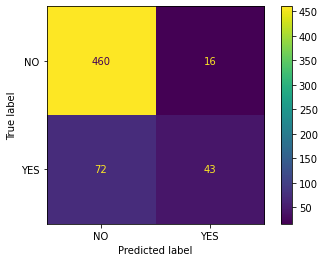

In [61]:
cm = confusion_matrix(y_test,y_pred_bestada_test, labels=best_ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_ada.classes_)

disp.plot()
plt.show()

True Negatif  = 460

False Negatif = 72

True Positif  = 43

False Positif =16

>Berdasarkan Classification Report di atas, akurasi dari train test set sudah memberikan score yang lumayan baik (tidak underfit atau overfit). Model ADA Boost classifier hanya memberikan Presisi sebesar 73% dengan data test yang mana kurang bagus, terlebih untuk recall yang bernilai **37%**.

>Model prediksi ini mementingkan agar memperkecil kemungkinan adanya False Negatif. False Negatif disini artinya nasabah tidak terdeteksi masih perlu membayar di bulan depan karena masih ada hutang, maka ini akan sangat merugikan perusahaan. Nilai akurasi keseluruhan dari model ternyata tidak sejalan dengan nilai recall.

> f1 score bernilai kecil karena data YES dan NO tidak balance untuk jumlahnya.

----
## Model Saving

In [62]:
# Model Saving

with open('pipeline_logreg.pkl', 'wb') as file_1:
  pickle.dump(pipeline_logreg, file_1)

with open('pipeline_svm.pkl', 'wb') as file_2:
  pickle.dump(pipeline_svm, file_2)
  
with open('pipeline_dt.pkl', 'wb') as file_3:
  pickle.dump(pipeline_dt, file_3)
  
with open('pipeline_rf.pkl', 'wb') as file_4:
  pickle.dump(pipeline_rf, file_4)
  
with open('pipeline_knn.pkl', 'wb') as file_5:
  pickle.dump(pipeline_knn, file_5)
  
with open('pipeline_nb.pkl', 'wb') as file_6:
  pickle.dump(pipeline_nb, file_6)
  
with open('pipeline_ada.pkl', 'wb') as file_7:
  pickle.dump(pipeline_ada, file_7)

with open('best_ada.pkl', 'wb') as file_8:
  pickle.dump(best_ada, file_8)

with open('list_num_columns.txt', 'w') as file_9:
  file_9.write(str(num_columns))

with open('list_cat_columns.txt', 'w') as file_10:
  file_10.write(str(cat_columns))

Menyimpan model-model dan list columns yang telah dibuat sebelumnya.

----

## Model Inference

In [63]:
# Load All Files

with open('pipeline_logreg.pkl', 'rb') as file_1:
  pipeline_logreg = pickle.load(file_1)

with open('pipeline_svm.pkl', 'rb') as file_2:
  pipeline_svm = pickle.load(file_2)
  
with open('pipeline_dt.pkl', 'rb') as file_3:
  pipeline_dt = pickle.load(file_3)
  
with open('pipeline_rf.pkl', 'rb') as file_4:
  pipeline_rf = pickle.load(file_4)

with open('pipeline_knn.pkl', 'rb') as file_5:
  pipeline_knn = pickle.load(file_5)

with open('pipeline_nb.pkl', 'rb') as file_6:
  pipeline_nb = pickle.load(file_6)

with open('pipeline_ada.pkl', 'rb') as file_7:
  pipeline_ada = pickle.load(file_7)
  
with open('best_ada.pkl', 'rb') as file_8:
  best_ada = pickle.load(file_8)

with open('list_num_columns.txt', 'r') as file_9:
  list_num_columns = file_9.read()

with open('list_cat_columns.txt', 'r') as file_10:
  list_cat_columns = file_10.read()

Load model yang telah dibuat.

### Inferencing

In [64]:
# Predict Inference-Set

y_pred_inf_ada = best_ada.predict(df_inf)
y_pred_inf_ada

array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO'],
      dtype=object)

Menggunakan model Decision Tree, dilakukan Attrition prediction dari df_inf tadi.

In [65]:
# Convert into DataFrame

y_pred_inf_ada_df = pd.DataFrame(y_pred_inf_ada, columns=['Def_Pay Prediction'])
y_pred_inf_ada_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Def_Pay Prediction  10 non-null     object
dtypes: object(1)
memory usage: 208.0+ bytes


Berikut hasil prediksi berdasarkan model yang telah dibuat.

In [66]:
# Merge Inference-Set and Prediction

pd.concat([df_inf, y_pred_inf_ada_df], axis=1)

,limit_balance,sex,edu,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_pay,Def_Pay Prediction
0,100000.0,1,2,2,31,1,2,0,0,0,...,76446.0,76815.0,0.0,3631.0,3000.0,3000.0,2800.0,2697.0,NO,NO
1,10000.0,2,2,2,27,1,2,2,0,0,...,8650.0,0.0,1230.0,0.0,500.0,450.0,0.0,0.0,YES,NO
2,180000.0,2,2,1,29,1,4,3,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,NO
3,300000.0,1,1,2,32,-2,-2,-2,-2,-2,...,414.0,264.0,264.0,264.0,264.0,414.0,264.0,264.0,NO,NO
4,230000.0,2,2,2,38,0,0,0,0,0,...,113365.0,115625.0,3867.0,3941.0,4123.0,4267.0,4300.0,4084.0,NO,NO
5,360000.0,2,1,2,32,0,0,0,0,0,...,241673.0,233157.0,10130.0,12649.0,8916.0,7725.0,8900.0,6956.0,NO,NO
6,380000.0,2,1,2,34,-1,0,0,0,0,...,164296.0,72084.0,100000.0,12384.0,100000.0,50000.0,20000.0,52500.0,NO,NO
7,140000.0,1,2,2,28,2,2,2,2,2,...,14222.0,14537.0,1600.0,600.0,700.0,600.0,700.0,600.0,YES,YES
8,90000.0,2,3,2,26,0,0,0,0,0,...,2269.0,3269.0,3000.0,3000.0,1000.0,500.0,1000.0,86500.0,NO,NO
9,120000.0,2,2,2,43,0,0,0,-1,0,...,26092.0,14586.0,77225.0,21903.0,25646.0,5080.0,0.0,5052.0,NO,NO


In [67]:
print('Classification Report (Data Inference)')
print('---------------------------------------------\n')
print(classification_report(df_inf['def_pay'], y_pred_inf_ada))

Classification Report (Data Inference)
---------------------------------------------

              precision    recall  f1-score   support

          NO       0.89      1.00      0.94         8
         YES       1.00      0.50      0.67         2

    accuracy                           0.90        10
   macro avg       0.94      0.75      0.80        10
weighted avg       0.91      0.90      0.89        10



Menggunakan model ADA Boost Classifier yang telah diatur hyperparameternya, dilakukan prediksi def_pay dari df_inf tadi yang telah dibuat diawal. Hasil recall 50% dengan ada 1 kesalahan dari 2 data.

----

## Kesimpulan

----

Dari 7 model prediksi telah dibuat model ADA Boost Classifier memberikan accuracy score berdasarkan Cross Validation yang terbaik sebesar 82.23%. Dilakukan modelling ulang dengan hyperparameter tuning pada model ADA Boost Classifier didapatkan parameter terbaik yaitu :

*> {'ada__learning_rate': 2.5, 'ada__n_estimators': 5}*

Setelah hyperparameter tuning, akurasi meningkat menjadi sebesar 83.16% pada data train dan 85.96% pada data test.

Berdasarkan Classification Report di atas, akurasi dari train test set sudah memberikan score yang lumayan baik (tidak underfit atau overfit). Model ADA Boost classifier hanya memberikan Presisi sebesar 73% dengan data test yang mana kurang bagus, terlebih untuk recall yang bernilai **37%**.

Model prediksi ini mementingkan agar memperkecil kemungkinan adanya False Negatif. False Negatif disini artinya nasabah tidak terdeteksi. Namun hasil dari modelling tidak memberikan nilai score recall yang bagus. Disimpulkan bahwa model ADA Boost Classifier pada dataset ini tidak cocok untuk melakukan prediksi.

---

### Jawab pertanyaan berikut:

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
    > *Sebagai target perhitungan algoritma decison tree yang mana menentukan bagaimana impurity of a split akan diukur*

2. Apakah fungsi dari pruning pada Tree model?
    > *Mengurangi outlier maupun noise data pada decision tree awal sehingga dapat meningkatkan akurasi pada klasifikasi data*

3. Bagaimana cara memilih K yang optimal pada KNN?
    > *K bernilai ganjil untuk menghindari adanya kesamaan jarak yang dapat muncul pada proses KNN dijalankan. Dalam memilih K bergantung juga dengan bentuk data, jika nilai K kecil misal 2 atau 3 bisa jadi hasil kurang akurat apalagi bila data banyak outlier akibatnya model menjadi overfit. Jika nilai K terlalu besar hasil akan lebih akurat, kelas dengan jumlah titik data yang kecil akan selalu “kalah jumlah” dalam proses klasifikasi. Selain itu, nilai K yang besar juga akan memakan waktu dan sumberdaya komputasi yang lebih tinggi.*

4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
    > *Metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi / evaluasi tujuannya untuk mendefinisikan dataset untuk "menguji" model dalam tahap pelatihan (yaitu, validasi data), dalam rangka untuk membatasi masalah seperti terjadinya overfitting.*

5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!
    > *Accuracy adalah nilai dari jumlah prediksi benar/True dibandingkan dengan seluruh jumlah prediksi*

    > *Precision adalah nilai jumlah prediksi True Positif dibandingkan dengan seluruh jumlah prediksi yang hasilnya Positif (True Positif dan False Positif)*

    > *Recall adalah nilai jumlah prediksi True Positif dibandingkan dengan seluruh jumlah prediksi yang bisa menjadi Positif (True Positif dan False Negatif)*
    
    > *F1 Score adalah rata-rata berbobot dari nilai precision dan recall, bergantung juga dengan balance atau tidaknya sebuah data.*

----------
----------